# MINI PROJECT

## TELCO CUSTOMER CHURN PREDICTION

#### SECTION 2 - MACHINE LEARNING MODEL BUILDING

Tujuan kali ini ialah untuk membuat model terbaik untuk memprediksi customer yang churn dan tidak.

## IMPORT LIBRARY

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
#load data
df = pd.read_csv("Telco-Customer-Churn-Clean.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## PREPROCESSING

> kelompokkan data numerical dan categoricalnya.

In [7]:
df_cat = df.select_dtypes(['object'])
df_num = df.drop(columns = df_cat.columns)

In [8]:
df_cat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [9]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


### DETECTING & HANDLING OUTLIERS

> Kita cek outliers pada data numerik saja

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [11]:
# fungsi untuk mencari quantile dan outliers
def find_outliers(data):
    
    #Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data , .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    # Looping dan append outliers
    lower_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            lower_out.append(i)
        elif(i > max_IQR):
            upper_out.append(i)
            
    return lower_out, upper_out

#### tenure

> Detecting outliers menggunakan Boxplot

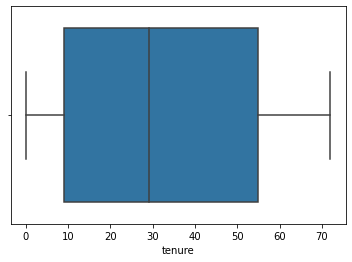

In [12]:
sns.boxplot(df_num["tenure"])
plt.show()

In [13]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["tenure"])[0]
upper_out = find_outliers(df_num["tenure"])[1]

In [14]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 0


#### MonthlyCharges

> Detecting outliers menggunakan Boxplot

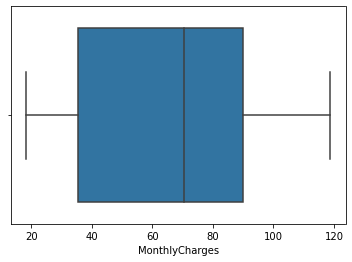

In [15]:
sns.boxplot(df_num["MonthlyCharges"])
plt.show()

In [16]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["MonthlyCharges"])[0]
upper_out = find_outliers(df_num["MonthlyCharges"])[1]

In [17]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 0


#### TotalCharges

> Detecting outliers menggunakan Boxplot

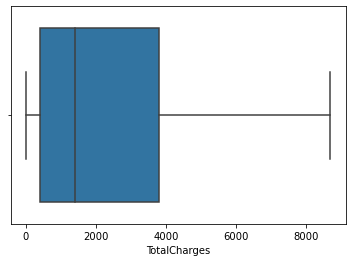

In [18]:
sns.boxplot(df_num["TotalCharges"])
plt.show()

In [19]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["TotalCharges"])[0]
upper_out = find_outliers(df_num["TotalCharges"])[1]

In [20]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 0


> Semua data sudah bersih dari Null Values, Outliers dan sudah sesuai dengan tipe datanya, maka kita bisa lanjut ke Feature Engineering

## FEATURE ENGINEERING

> Kita akan drop customerID karena termasuk kedalam identifier

In [21]:
df_cat = df_cat.drop(columns = "customerID") 

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: object(17)


In [23]:
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


### FEATURE ENCODING

In [24]:
# import library untuk encoder
from sklearn.preprocessing import LabelEncoder

#### ONE-HOT ENCODING

> Menggunakan one-hot encoding pada semua features kecuali feature target (Churn)

In [25]:
df_cat = pd.get_dummies(df_cat,
                        prefix = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"],
                        columns=["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
                       )

df_cat = pd.get_dummies(df_cat,
                        prefix = ["gender", "SeniorCitizen", "Partner", "Dependent", "PhoneService", "PaperlessBilling"],
                        columns=["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"],
                        drop_first = True
                       )

#### LABEL ENCODING

> Label encoding hanya digunakan untuk melakukan encoding pada variabel target (y)

In [26]:
# contoh label encoding, gunakan fit_transform untuk encode data
df_cat["Churn"] = LabelEncoder().fit_transform(df_cat[["Churn"]])

In [27]:
# cek hasil
df_cat.groupby(["Churn"])["gender_Male"].count()

Churn
0    5174
1    1869
Name: gender_Male, dtype: int64

In [28]:
df_cat.head()

,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,1
3,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1


### FEATURE SCALING

In [29]:
# import library untuk scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

> Kita akan melakukan feature scaling pada numerical features.

In [30]:
df_num.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [31]:
# min max scaler
scaler = MinMaxScaler()

In [32]:
column_name = ["tenure", "MonthlyCharges", "TotalCharges"]

In [33]:
for i in column_name:
    df_num[i] = scaler.fit_transform(df_num[[i]])

In [34]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.003437
1,0.472222,0.385075,0.217564
2,0.027778,0.354229,0.012453
3,0.625000,0.239303,0.211951
4,0.027778,0.521891,0.017462


### FEATURE SELECTION

In [35]:
# import library untuk selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [36]:
df_new = pd.concat([df_num, df_cat], axis = 1)

In [37]:
df_new.head()

,tenure,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0.013889,0.115423,0.003437,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0.472222,0.385075,0.217564,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,0.027778,0.354229,0.012453,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
3,0.625000,0.239303,0.211951,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.027778,0.521891,0.017462,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   float64
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   int32  
 4   MultipleLines_No                         7043 non-null   uint8  
 5   MultipleLines_No phone service           7043 non-null   uint8  
 6   MultipleLines_Yes                        7043 non-null   uint8  
 7   InternetService_DSL                      7043 non-null   uint8  
 8   InternetService_Fiber optic              7043 non-null   uint8  
 9   InternetService_No                       7043 non-null   uint8  
 10  OnlineSecurity_No                        7043 no

#### EMBEDDED METHOD (FEATURE IMPORTANCES)

In [39]:
# split dependent dan independent (target)
X = df_new.drop(columns=["Churn"])# independent feature, non target
y = df_new["Churn"] # target

In [40]:
# embedded method dengan ExtraTree
model = ExtraTreesClassifier()
model.fit(X,y) # fit model
print(model.feature_importances_) # gunakan inbuilt class: feature_importances

[0.1359679  0.11937457 0.14127515 0.01448445 0.00388696 0.01492023
 0.01194386 0.02785229 0.00148836 0.03102793 0.00334412 0.01238681
 0.02016316 0.00324943 0.01357223 0.01838568 0.00068111 0.01311997
 0.03043055 0.00225457 0.01065325 0.0131904  0.00374936 0.01297717
 0.01358632 0.00214421 0.0128984  0.05737208 0.01155603 0.01516946
 0.01304678 0.01508789 0.03107401 0.01171867 0.0374495  0.02692336
 0.030982   0.02556481 0.00396696 0.03107998]


In [41]:
# hasil feature importances
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

In [42]:
feat_importances.nlargest(10)

TotalCharges                      0.141275
tenure                            0.135968
MonthlyCharges                    0.119375
Contract_Month-to-month           0.057372
gender_Male                       0.037450
PaperlessBilling_Yes              0.031080
PaymentMethod_Electronic check    0.031074
OnlineSecurity_No                 0.031028
Partner_Yes                       0.030982
TechSupport_No                    0.030431
dtype: float64

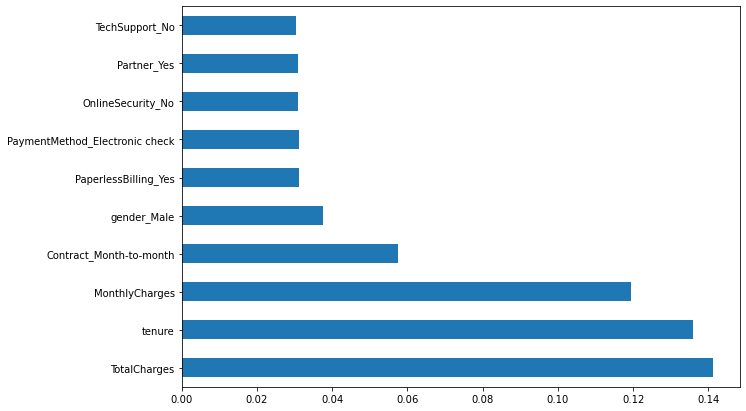

In [43]:
# plot hasil feature importances
plt.figure(figsize = (10,7))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [44]:
# masukkan hasil kedalam dataframe baru.
col = feat_importances.nlargest(10).index.tolist()

col.append("Churn")

df_new = df_new[col]

In [45]:
df_new.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,gender_Male,PaperlessBilling_Yes,PaymentMethod_Electronic check,OnlineSecurity_No,Partner_Yes,TechSupport_No,Churn
0,0.003437,0.013889,0.115423,1,0,1,1,1,1,1,0
1,0.217564,0.472222,0.385075,0,1,0,0,0,0,1,0
2,0.012453,0.027778,0.354229,1,1,1,0,0,0,1,1
3,0.211951,0.625000,0.239303,0,1,0,0,0,0,0,0
4,0.017462,0.027778,0.521891,1,0,1,1,1,0,1,1


> Convert data ke csv untuk digunakan di section hyperparameter

In [46]:
df_ready_log = df_new.copy()

In [47]:
df_ready_log.to_csv("df_ready_log.csv", index = False)

> Karena DecisionTree dan ensemble model tidak perlu discaling maka kita buat csv yg berbeda

In [48]:
df_num_dec = df.select_dtypes(["int", "float"])

In [49]:
df_ready_dec = pd.concat([df_num_dec, df_cat], axis = 1)

In [50]:
df_ready_dec = df_ready_dec.copy()

In [51]:
df_ready_dec.to_csv("df_ready_dec.csv", index = False)

## MODELING

In [52]:
#import library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score
# import library ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

# untuk undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

## LOGISTIC REGRESSION

In [53]:
# split target variable
X = df_ready_log.drop(columns = 'Churn')
y = df_ready_log['Churn']

In [54]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [55]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
# buat ypredict
y_pred = model.predict(X_test)

In [57]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [58]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [59]:
#cek hasil
result.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,gender_Male,PaperlessBilling_Yes,PaymentMethod_Electronic check,OnlineSecurity_No,Partner_Yes,TechSupport_No,y_act,y_pred
2200,0.120354,0.263889,0.397512,0,0,0,1,1,0,1,0,0
4627,0.811706,0.833333,0.978607,0,1,1,0,0,0,0,0,0
3225,0.106376,0.180556,0.534328,1,0,1,1,0,0,1,0,1
2828,0.002355,0.013889,0.021891,0,1,0,0,0,0,0,0,0
3768,0.491249,0.763889,0.592040,1,0,1,0,1,1,1,0,0


#### CONFUSION MATRIX

In [60]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[923 118]
 [172 196]]


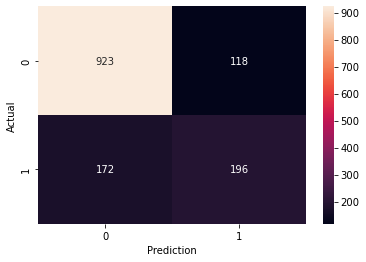

In [61]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [62]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.53      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [63]:
# fungsi untuk melakukan plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label = labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 0.7096280750114856



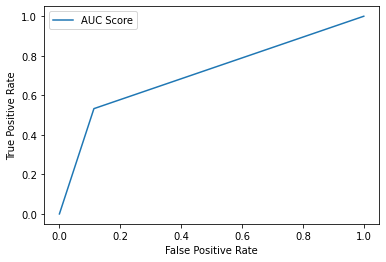

In [64]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [65]:
recall_score(y_test, y_pred)

0.532608695652174

#### CV SCORE

In [66]:
# cek 1fold cross val
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,80.102946
Model Score in Data Test,79.418027


In [68]:
# fungsi untuk kfold cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [69]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",10))

CV Recall : (0.5580760549238005, 0.7997823841376617)


### LOGISTIC REGRESSION (TUNED)

In [70]:
# split target variable
X = df_ready_log.drop(columns = 'Churn')
y = df_ready_log['Churn']

In [71]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [72]:
# model train dan fitting
model = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter=875, l1_ratio = 1, C=  0.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, l1_ratio=1, max_iter=875, penalty='none',
                   solver='newton-cg')

In [73]:
# buat ypredict
y_pred_log = model.predict(X_test)

In [74]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred_log

In [75]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [76]:
#cek hasil
result.head()

,TotalCharges,tenure,MonthlyCharges,Contract_Month-to-month,gender_Male,PaperlessBilling_Yes,PaymentMethod_Electronic check,OnlineSecurity_No,Partner_Yes,TechSupport_No,y_act,y_pred
2200,0.120354,0.263889,0.397512,0,0,0,1,1,0,1,0,0
4627,0.811706,0.833333,0.978607,0,1,1,0,0,0,0,0,0
3225,0.106376,0.180556,0.534328,1,0,1,1,0,0,1,0,1
2828,0.002355,0.013889,0.021891,0,1,0,0,0,0,0,0,0
3768,0.491249,0.763889,0.592040,1,0,1,0,1,1,1,0,0


#### CONFUSION MATRIX

In [77]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_log))

[[924 117]
 [172 196]]


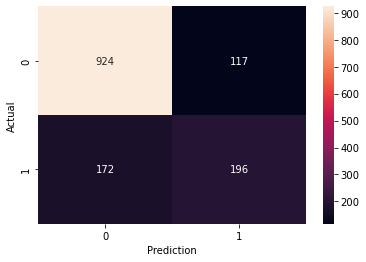

In [78]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [79]:
# classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.63      0.53      0.58       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409




model AUC score: 0.7101083824082195



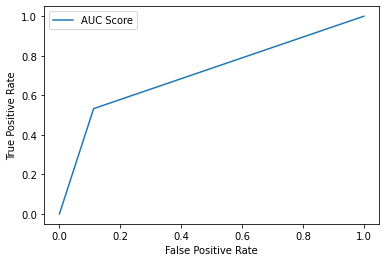

In [80]:
#plot roc auc
plot_roc_curve(y_test, y_pred_log, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_log)}\n")
plt.show()

In [81]:
recall_score(y_test, y_pred_log)

0.532608695652174

#### CV SCORE

In [82]:
# cek 1fold cross val
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,80.120696
Model Score in Data Test,79.488999


In [83]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [84]:
print("CV Recall Tuned :", cv_score(model, X_train, y_train, "recall",10))

CV Recall Tuned : (0.5640767109778032, 0.8001379388534069)


### OVERSAMPLING (SMOTE)

In [85]:
# cek sebelum oversampling
print('X_train sebelum Oversampling', X_train.shape)
print('y_train sebelum Oversampling', y_train.shape, '\n')

print("Label '1' sebelum Oversampling", sum(y_train == 1))
print("Label '0' sebelum Oversampling", sum(y_train == 0))

X_train sebelum Oversampling (5634, 10)
y_train sebelum Oversampling (5634,) 

Label '1' sebelum Oversampling 1501
Label '0' sebelum Oversampling 4133


In [86]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [87]:
# cek sesudah oversampling
print('X_train sesudah Oversampling', X_train_sm.shape)
print('y_train sesudah Oversampling', y_train_sm.shape, '\n')

print("Label '1' sesudah Oversampling", sum(y_train_sm == 1))
print("Label '0' sesudah Oversampling", sum(y_train_sm == 0))

X_train sesudah Oversampling (8266, 10)
y_train sesudah Oversampling (8266,) 

Label '1' sesudah Oversampling 4133
Label '0' sesudah Oversampling 4133


In [88]:
#fitting model dengan data oversampling
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm = model_sm.predict(X_test)

#### CONFUSION MATRIX

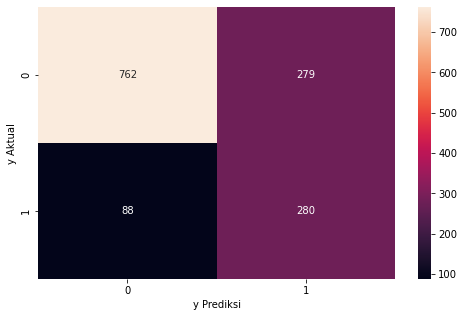

In [89]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [90]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1041
           1       0.50      0.76      0.60       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409




model AUC score (oversampling): 0.7464290189199349

model AUC score (normal) : 0.7096280750114856



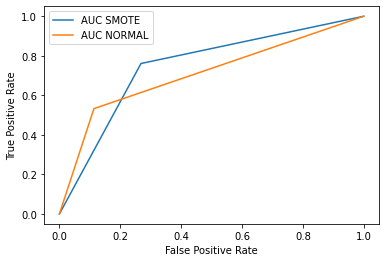

In [91]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [92]:
recall_score(y_test, y_pred_sm)

0.7608695652173914

#### CV SCORE

In [93]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,75.292865
Model Score in Data Test,73.953158


In [94]:
print("CV Recall SMOTE:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE: (0.5640767109778032, 0.8001379388534069)


### OVERSAMPLING (SMOTE) + TUNING

In [95]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [96]:
#fitting model dengan data oversampling + tuning
model_sm = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter=875, l1_ratio = 1, C=  0.01)
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm_tuned = model_sm.predict(X_test)

#### CONFUSION MATRIX

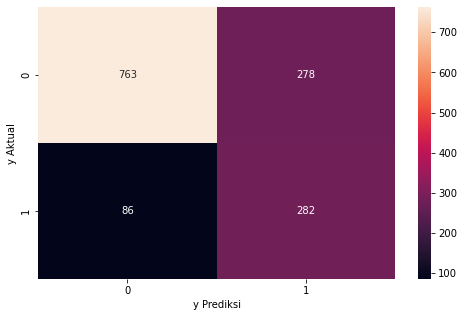

In [97]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm_tuned), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [98]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm_tuned))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1041
           1       0.50      0.77      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409




model AUC score (oversampling): 0.7464290189199349

model AUC score (normal) : 0.7096280750114856



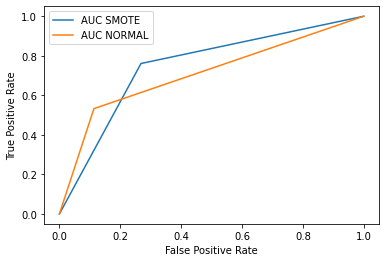

In [99]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [100]:
recall_score(y_test, y_pred_sm_tuned)

0.7663043478260869

#### CV SCORE

In [101]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,75.186368
Model Score in Data Test,74.166075


In [102]:
print("CV Recall SMOTE + Tuned:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE + Tuned: (0.5640767109778032, 0.8001379388534069)


### COMPARISON

> Bandingkan Recall Score ke-4 nya

In [103]:
print("recall base           :",recall_score(y_test, y_pred))
print("recall tuned          :",recall_score(y_test, y_pred_log))
print("recall smote          :",recall_score(y_test, y_pred_sm))
print("recall smote + tuned :",recall_score(y_test, y_pred_sm_tuned))

recall base           : 0.532608695652174
recall tuned          : 0.532608695652174
recall smote          : 0.7608695652173914
recall smote + tuned : 0.7663043478260869


# --------------------------

## DECISION TREE

In [104]:
# split target variable
X = df_ready_dec.drop(columns = 'Churn')
y = df_ready_dec['Churn']

In [105]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [106]:
# model train dan fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
# buat ypredict
y_pred = model.predict(X_test)

In [108]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [109]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [110]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0


#### CONFUSION MATRIX

In [111]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[839 202]
 [183 185]]


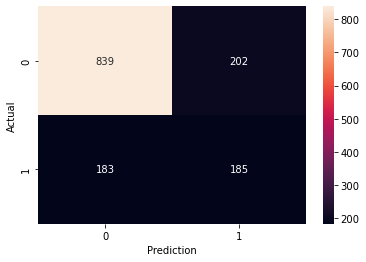

In [112]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [113]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1041
           1       0.48      0.50      0.49       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409




model AUC score: 0.6543366015119241



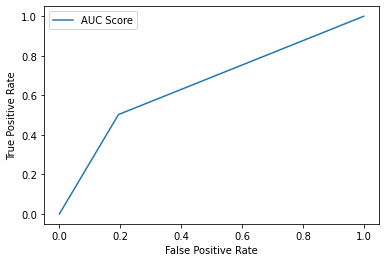

In [114]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [115]:
recall_score(y_test, y_pred)

0.5027173913043478

#### CV SCORE

In [116]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,99.751509
Model Score in Data Test,72.675656


In [117]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",10))

CV Recall : (0.49735360278310015, 0.7307380043586158)


### DECISION TREE (TUNED)

In [118]:
# split target variable
X = df_ready_dec.drop(columns = 'Churn')
y = df_ready_dec['Churn']

In [119]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [120]:
# model train dan fitting
model = DecisionTreeClassifier(splitter = 'best', min_samples_split = 3, min_samples_leaf=1, max_depth = 2, criterion=  'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=3)

In [121]:
# buat ypredict
y_pred_dec = model.predict(X_test)

In [122]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred_dec

In [123]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [124]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,1


#### CONFUSION MATRIX

In [125]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_dec))

[[849 192]
 [148 220]]


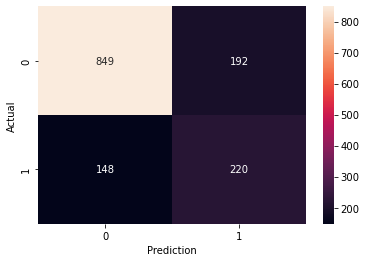

In [126]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dec), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [127]:
# classification report
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1041
           1       0.53      0.60      0.56       368

    accuracy                           0.76      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409




model AUC score: 0.7066940233053501



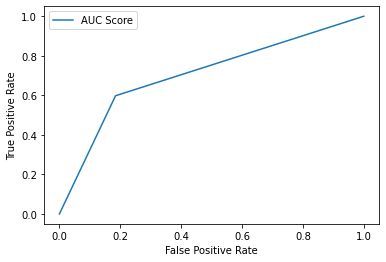

In [128]:
#plot roc auc
plot_roc_curve(y_test, y_pred_dec, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_dec)}\n")
plt.show()

In [129]:
recall_score(y_test, y_pred_dec)

0.5978260869565217

#### CV SCORE

In [130]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,76.340078
Model Score in Data Test,75.869411


In [131]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",10))

CV Recall : (0.628890206182809, 0.7634027436604816)


### OVERSAMPLING (SMOTE)

In [132]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [133]:
#fitting model dengan data oversampling
model_sm = DecisionTreeClassifier()
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm = model_sm.predict(X_test)

#### CONFUSION MATRIX

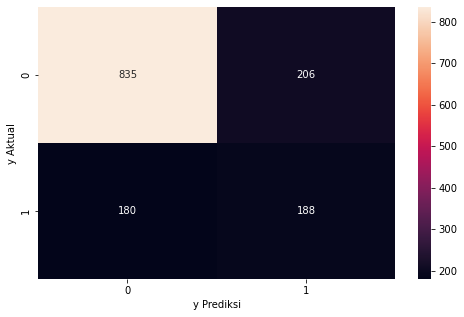

In [134]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [135]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.48      0.51      0.49       368

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409




model AUC score (oversampling): 0.6564914588815103

model AUC score (normal) : 0.6543366015119241



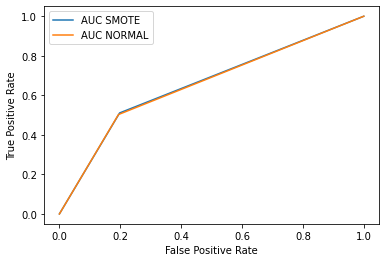

In [136]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [137]:
recall_score(y_test, y_pred_sm)

0.5108695652173914

#### CV SCORE

In [138]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,99.751509
Model Score in Data Test,72.604684


In [139]:
print("CV Recall SMOTE:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE: (0.628890206182809, 0.7634027436604816)


### OVERSAMPLING (SMOTE) + TUNING

In [140]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [141]:
#fitting model dengan data oversampling + tuning
model_sm = DecisionTreeClassifier(splitter = 'best', min_samples_split = 3, min_samples_leaf=1, max_depth = 2, criterion=  'gini')
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm_tuned = model_sm.predict(X_test)

#### CONFUSION MATRIX

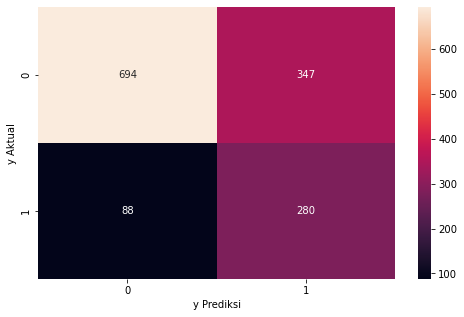

In [142]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm_tuned), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [143]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm_tuned))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1041
           1       0.45      0.76      0.56       368

    accuracy                           0.69      1409
   macro avg       0.67      0.71      0.66      1409
weighted avg       0.77      0.69      0.71      1409




model AUC score (oversampling): 0.6564914588815103

model AUC score (normal) : 0.6543366015119241



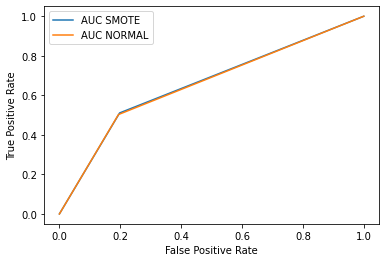

In [144]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [145]:
recall_score(y_test, y_pred_sm_tuned)

0.7608695652173914

#### CV SCORE

In [146]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,69.737309
Model Score in Data Test,69.127040


In [147]:
print("CV Recall SMOTE + Tuned:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE + Tuned: (0.628890206182809, 0.7634027436604816)


### COMPARISON

> Bandingkan Recall Score ke-4 nya

In [148]:
print("recall base           :",recall_score(y_test, y_pred))
print("recall tuned          :",recall_score(y_test, y_pred_dec))
print("recall smote          :",recall_score(y_test, y_pred_sm))
print("recall smote + tuned :",recall_score(y_test, y_pred_sm_tuned))

recall base           : 0.5027173913043478
recall tuned          : 0.5978260869565217
recall smote          : 0.5108695652173914
recall smote + tuned : 0.7608695652173914


# --------------------------

## GRADIENTBOOSTINGCLASSIFIER

In [149]:
# split target variable
X = df_ready_dec.drop(columns = 'Churn')
y = df_ready_dec['Churn']

In [150]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [151]:
# model train dan fitting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [152]:
# buat ypredict
y_pred = model.predict(X_test)

In [153]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [154]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [155]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0


#### CONFUSION MATRIX

In [156]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[926 115]
 [190 178]]


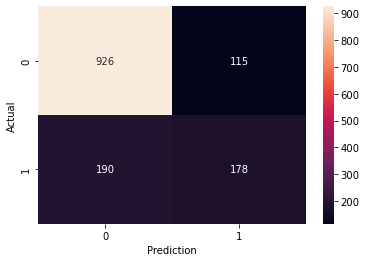

In [157]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [158]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.48      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409




model AUC score: 0.686612475462557



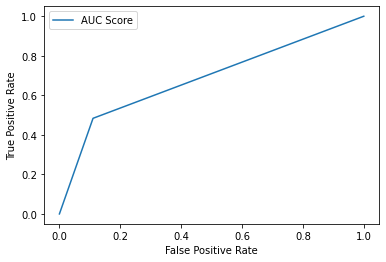

In [159]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [160]:
recall_score(y_test, y_pred)

0.483695652173913

#### CV SCORE

In [161]:
# cek 1fold cross val
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,83.120341
Model Score in Data Test,78.353442


In [162]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",10))

CV Recall : (0.537311864655332, 0.8015601577163876)


### GRADIENTBOOSTINGCLASSIFIER (TUNED)

In [163]:
# split target variable
X = df_ready_dec.drop(columns = 'Churn')
y = df_ready_dec['Churn']

In [164]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [165]:
# model train dan fitting
model = GradientBoostingClassifier(n_estimators = 625, max_depth = 6, learning_rate=10, min_samples_split = 8, min_samples_leaf=  9)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=10, max_depth=6, min_samples_leaf=9,
                           min_samples_split=8, n_estimators=625)

In [166]:
# buat ypredict
y_pred_gb = model.predict(X_test)

In [167]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred_gb

In [168]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [169]:
#cek hasil
result.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependent_Yes,PhoneService_Yes,PaperlessBilling_Yes,y_act,y_pred
2200,19,58.20,1045.25,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4627,60,116.60,7049.50,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
3225,13,71.95,923.85,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,1
2828,1,20.45,20.45,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
3768,55,77.75,4266.40,0,0,1,0,1,0,1,...,0,0,0,0,1,0,1,1,0,1


#### CONFUSION MATRIX

In [170]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_gb))

[[387 654]
 [ 56 312]]


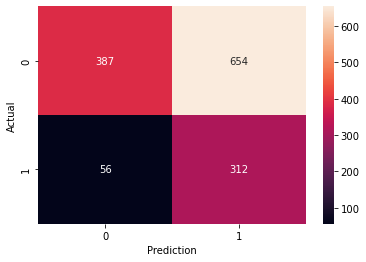

In [171]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#### MODEL EVALUATION

In [172]:
# classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.37      0.52      1041
           1       0.32      0.85      0.47       368

    accuracy                           0.50      1409
   macro avg       0.60      0.61      0.49      1409
weighted avg       0.73      0.50      0.51      1409




model AUC score: 0.6097920060142838



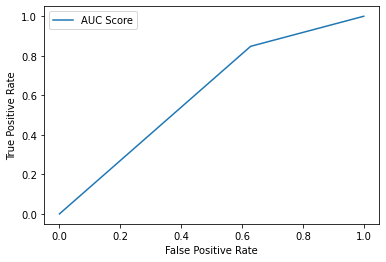

In [173]:
#plot roc auc
plot_roc_curve(y_test, y_pred_gb, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred_gb)}\n")
plt.show()

In [174]:
recall_score(y_test, y_pred_gb)

0.8478260869565217

#### CV SCORE

In [175]:
# cek 1fold cross val
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                     model.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,51.863685
Model Score in Data Test,49.609652


In [176]:
print("CV Recall :", cv_score(model, X_train, y_train, "recall",10))

CV Recall : (0.49350205224870647, 0.45014549714674423)


### OVERSAMPLING (SMOTE)

In [177]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [178]:
#fitting model dengan data oversampling
model_sm = DecisionTreeClassifier()
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm = model_sm.predict(X_test)

#### CONFUSION MATRIX

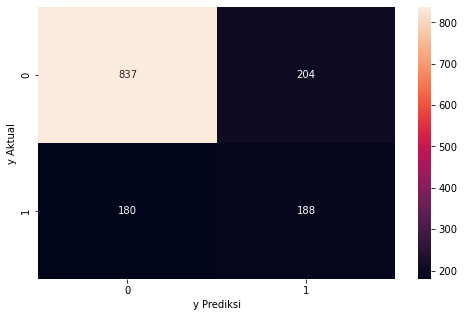

In [179]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [180]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1041
           1       0.48      0.51      0.49       368

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409




model AUC score (oversampling): 0.657452073674978

model AUC score (normal) : 0.686612475462557



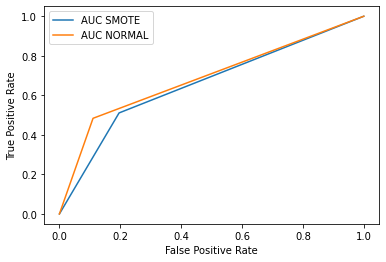

In [181]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [182]:
recall_score(y_test, y_pred_sm)

0.5108695652173914

#### CV SCORE

In [183]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,99.751509
Model Score in Data Test,72.746629


In [184]:
print("CV Recall SMOTE:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE: (0.49591610878041, 0.44854691810589165)


### OVERSAMPLING (SMOTE) + TUNING

In [185]:
# gunakan smote untuk oversampling
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [186]:
#fitting model dengan data oversampling + tuning
model_sm = GradientBoostingClassifier(n_estimators = 625, max_depth = 6, learning_rate=10, min_samples_split = 8, min_samples_leaf=  9)
model_sm.fit(X_train_sm, y_train_sm)

# buat prediksi dengan model oversampling
y_pred_sm_tuned = model_sm.predict(X_test)

#### CONFUSION MATRIX

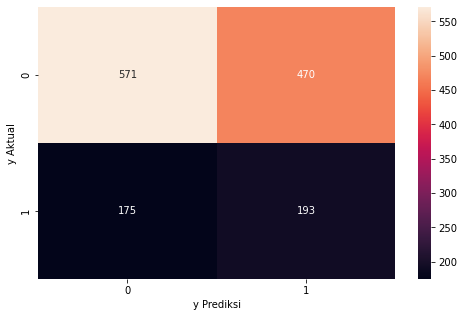

In [187]:
# cek hasil oversampling dengan confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm_tuned), annot=True, fmt = '.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

#### MODEL EVALUATION

In [188]:
# classification report setelah oversampling
print(classification_report(y_test, y_pred_sm_tuned))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64      1041
           1       0.29      0.52      0.37       368

    accuracy                           0.54      1409
   macro avg       0.53      0.54      0.51      1409
weighted avg       0.64      0.54      0.57      1409




model AUC score (oversampling): 0.657452073674978

model AUC score (normal) : 0.686612475462557



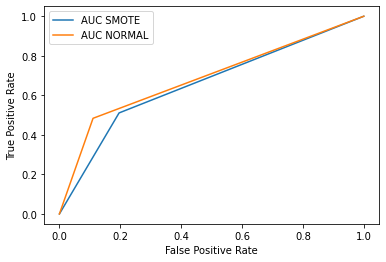

In [189]:
# plot roc auc setelah oversampling
plot_roc_curve(y_test, y_pred_sm, "AUC SMOTE")
plot_roc_curve(y_test, y_pred, "AUC NORMAL")
print(f"\nmodel AUC score (oversampling): {roc_auc_score(y_test, y_pred_sm)}")
print(f"\nmodel AUC score (normal) : {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [190]:
recall_score(y_test, y_pred_sm_tuned)

0.5244565217391305

#### CV SCORE

In [191]:
# cek 1fold cross val setelah oversampling
pd.DataFrame(data = [model_sm.score(X_train, y_train)*100,
                     model_sm.score(X_test, y_test)*100],
             index = ["Model Score in Data Train", "Model Score in Data Test"],
             columns = ["Score(%)"]
            )

,Score(%)
Model Score in Data Train,55.324814
Model Score in Data Test,54.222853


In [192]:
print("CV Recall SMOTE + Tuned:", cv_score(model, X_train, y_train, "recall",10))

CV Recall SMOTE + Tuned: (0.49350205224870647, 0.46095354169028635)


### COMPARISON

> Bandingkan Recall Score ke-4 nya

In [193]:
print("recall base           :",recall_score(y_test, y_pred))
print("recall tuned          :",recall_score(y_test, y_pred_gb))
print("recall smote          :",recall_score(y_test, y_pred_sm))
print("recall smote + tuned :",recall_score(y_test, y_pred_sm_tuned))

recall base           : 0.483695652173913
recall tuned          : 0.8478260869565217
recall smote          : 0.5108695652173914
recall smote + tuned : 0.5244565217391305


## BEST MODEL CONCLUSION

> Berdasarkan hasil experiment yang telah saya lakukan terhadap ketiga model tersebut (LogisticRegression(), DecisionTreeClassifier(), dan GradientBoostingClassifier().
>
> Dapat saya simpulkan bahwa, menurut saya model LogisticRegression dengan Oversampling Method (SMOTE) + HyperParameterTuning adalah model yang terbaik untuk menghandling data ini.